In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [7]:
zero_columns = [col for col in df.columns if 'zero' in col ]
df.drop(columns=zero_columns, inplace=True)

In [8]:
from sklearn.preprocessing import OneHotEncoder
catergorical_cols = ['Sex', 'Embarked', 'Pclass']
ohe = OneHotEncoder(sparse=False, drop='first')

In [9]:
ohe_transformed = ohe.fit_transform(df[catergorical_cols])
ohe_feature_names = ohe.get_feature_names_out(catergorical_cols)
df_ohe = pd.DataFrame(ohe_transformed, columns=ohe_feature_names)

/Users/tarun/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
df.drop(columns=catergorical_cols, inplace=True)
df_encoded = pd.concat([df.reset_index(drop=True), df_ohe], axis=1)

In [11]:
X = df_encoded.drop(columns=['Passengerid', '2urvived'])
y = df['2urvived']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

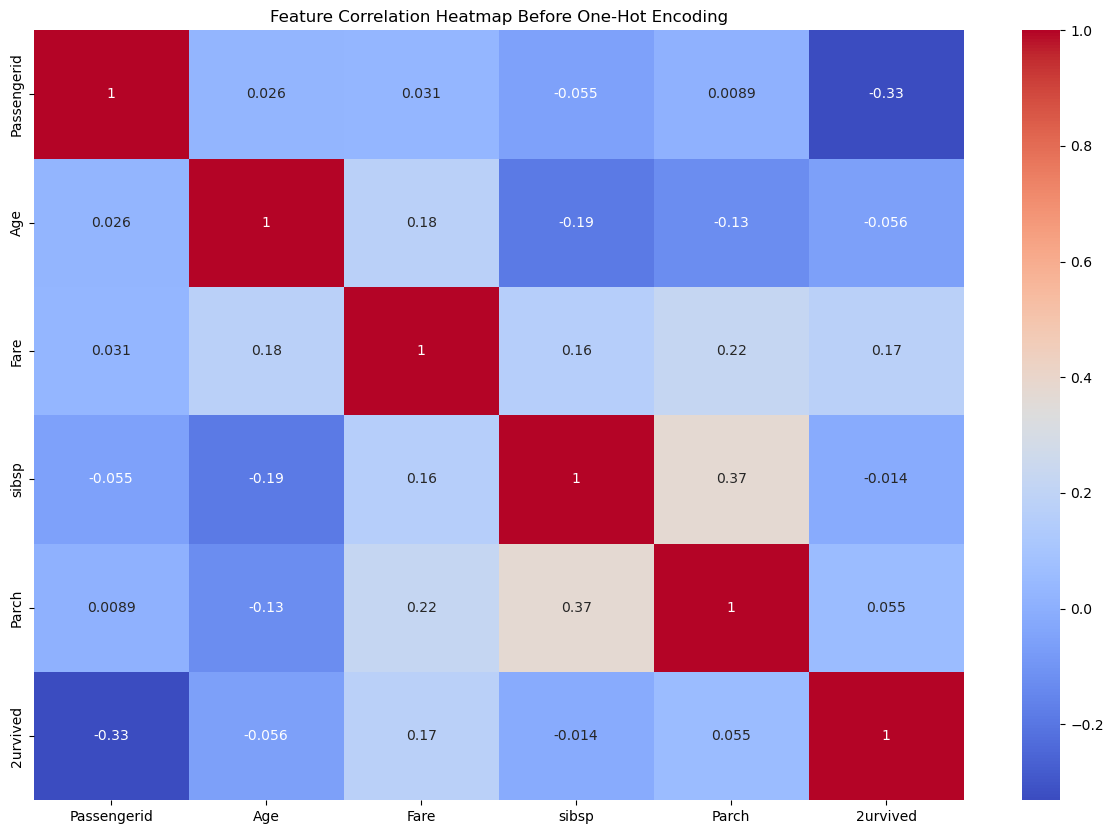

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap Before One-Hot Encoding')
plt.show()

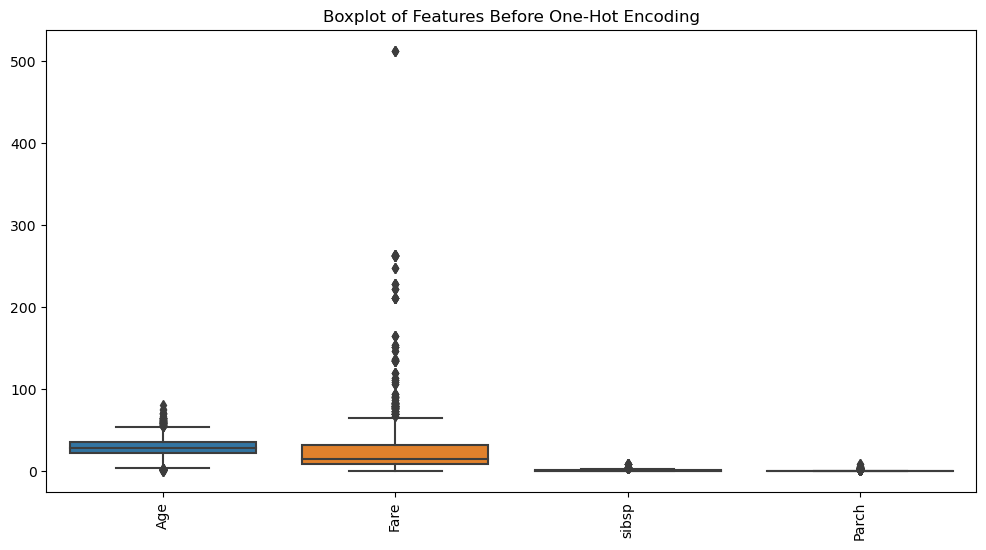

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Passengerid', '2urvived']))
plt.title('Boxplot of Features Before One-Hot Encoding')
plt.xticks(rotation=90)
plt.show()

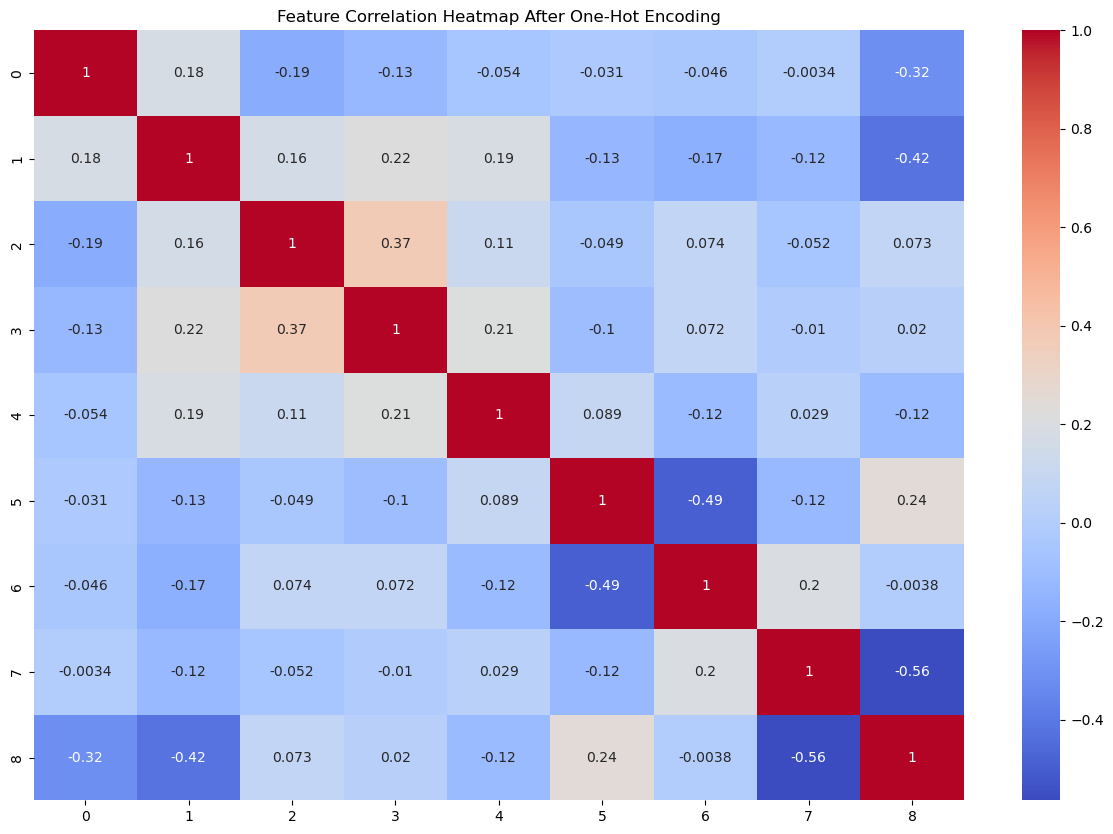

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.DataFrame(x_scaled).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap After One-Hot Encoding')
plt.show()

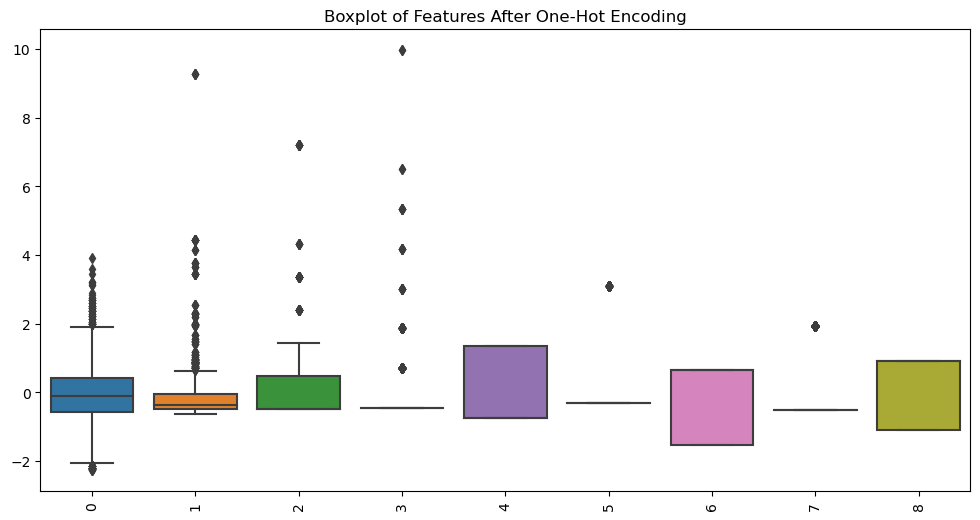

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=pd.DataFrame(x_scaled))
plt.title('Boxplot of Features After One-Hot Encoding')
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.6984732824427481
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.77      0.79       189
           1       0.46      0.51      0.48        73

    accuracy                           0.70       262
   macro avg       0.63      0.64      0.64       262
weighted avg       0.71      0.70      0.70       262

